<a href="https://colab.research.google.com/github/vicsoliveira/LH_CD_VICTORIAOLIVEIRA/blob/main/LH_CD_VICTORIAOLIVEIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Lighthouse - Ciência de Dados

Análise de dados cinematográficos para o estúdio PProductions
---

Esse desafio foi realizado utilizando o modelo de notebook fornecido pelo curso do Google Developers

In [188]:
#@title Copyright 2023 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [189]:
#@title Instalação das bibliotecas necessárias

!pip install google-ml-edu==0.1.3 \
  keras~=3.8.0 \
  matplotlib~=3.10.0 \
  numpy~=2.0.0 \
  pandas~=2.2.0 \
  tensorflow~=2.18.0

print('\n\nTodas as Bibliotecas foram instasladas com sucesso.')



Todas as Bibliotecas foram instasladas com sucesso.


## Análise exploratória dos dados (EDA)

Inicialmente foi realizada uma análise exploratória dos dados (EDA) com o banco de dados fornecido 'desafio_indicium_imdb'.

O objetivo foi demonstrar as principais características entre as variáveis do banco de dados e algumas hipóteses relacionadas.

1. A análise deve ser capaz fornecer informações para embasar a recomendação de um filme para uma pessoa desconhecida e indicar os principais fatores que estão relacionados com a alta expectativa de faturamento de um filme.

2. Além disso, devem ser obtidos insights com a coluna Overview do banco de dados.


## O banco de dados possui as seguintes colunas com as respectivas descrições:

1.  Series_Title – Nome do filme
2.  Released_Year - Ano de lançamento
3.  Certificate - Classificação etária
4.  Runtime – Tempo de duração
5.  Genre - Gênero
6.  IMDB_Rating - Nota do IMDB
7.  Overview - Overview do filme
8.  Meta_score - Média ponderada de todas as críticas
9.  Director – Diretor
10. Star1 - Ator/atriz #1
11. Star2 - Ator/atriz #2
12. Star3 - Ator/atriz #3
13. Star4 - Ator/atriz #4
14. No_of_Votes - Número de votos
15. Gross - Faturamento


In [190]:
#@title Importar dependências

# data
import numpy as np
import pandas as pd
import seaborn as sns


# machine learning
import keras
import ml_edu.experiment
import ml_edu.results
import matplotlib.pyplot as plt

# data visualization
import plotly.express as px

import statistics
from statistics import mode

## Etapas Iniciais

O banco de dados será lido a partir da biblioteca do python, pandas.

In [191]:
film_dataset = pd.read_csv("/content/desafio_indicium_imdb.csv")
film_dataset.info()
display(film_dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,995,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
995,996,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
996,997,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
997,998,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


Ao analisar as informações sobre a tabela de dados e os valores das 5 primeiras e 5 últimas linhas foi possível observar os seguintes pontos:

1. O total de linhas da tabela é 999;
2. As colunas 'Certificate', 'Meta_score' e 'Gross' possuem dados vazios, sendo a coluna 'Gross' a que possui a maior quantidade de dados nulos: 830;
3. A maioria dos dados são do tipo object. Os dados serão transformados para tipo texto (StringDtype) ou númerico (float), a depender da coluna. O 'Runtime' e o 'Gross' precisaram ser editados antes de tranformar para número, retirando a parte textual antes (' min' e ',', respectivamente).
4.  Além disso, as linhas com valores vazios das colunas 'Gross', 'Meta_score' e 'Released_Year' foram excluídas.

In [192]:
film_dataset['Gross'] = film_dataset['Gross'].astype(str).str.replace(',','')
film_dataset['Gross'] = pd.to_numeric(film_dataset['Gross'], errors='coerce')
film_dataset['Runtime'] = film_dataset['Runtime'].astype(str).str.replace(' min','')
film_dataset['Runtime'] = pd.to_numeric(film_dataset['Runtime'], errors='coerce')
film_dataset['Released_Year'] = pd.to_numeric(film_dataset['Released_Year'], errors='coerce')

film_dataset = film_dataset[film_dataset['Gross'].notnull() & film_dataset['Meta_score'].notnull() & film_dataset['Released_Year'].notnull()].reset_index(drop=True)

# Explicitly convert numeric columns to float
film_dataset['Gross'] = film_dataset['Gross'].astype(float)
film_dataset['Runtime'] = film_dataset['Runtime'].astype(float)
film_dataset['Released_Year'] = film_dataset['Released_Year'].astype(float)
film_dataset['IMDB_Rating'] = film_dataset['IMDB_Rating'].astype(float)
film_dataset['Meta_score'] = film_dataset['Meta_score'].astype(float)
film_dataset['No_of_Votes'] = film_dataset['No_of_Votes'].astype(float)

# Explicitly convert string columns to pandas string dtype
film_dataset['Series_Title'] = film_dataset['Series_Title'].astype(pd.StringDtype())
film_dataset['Certificate'] = film_dataset['Certificate'].astype(pd.StringDtype())
film_dataset['Genre'] = film_dataset['Genre'].astype(pd.StringDtype())
film_dataset['Overview'] = film_dataset['Overview'].astype(pd.StringDtype())
film_dataset['Director'] = film_dataset['Director'].astype(pd.StringDtype())
film_dataset['Star1'] = film_dataset['Star1'].astype(pd.StringDtype())
film_dataset['Star2'] = film_dataset['Star2'].astype(pd.StringDtype())
film_dataset['Star3'] = film_dataset['Star3'].astype(pd.StringDtype())
film_dataset['Star4'] = film_dataset['Star4'].astype(pd.StringDtype())

film_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     748 non-null    int64  
 1   Series_Title   748 non-null    string 
 2   Released_Year  748 non-null    float64
 3   Certificate    712 non-null    string 
 4   Runtime        748 non-null    float64
 5   Genre          748 non-null    string 
 6   IMDB_Rating    748 non-null    float64
 7   Overview       748 non-null    string 
 8   Meta_score     748 non-null    float64
 9   Director       748 non-null    string 
 10  Star1          748 non-null    string 
 11  Star2          748 non-null    string 
 12  Star3          748 non-null    string 
 13  Star4          748 non-null    string 
 14  No_of_Votes    748 non-null    float64
 15  Gross          748 non-null    float64
dtypes: float64(6), int64(1), string(9)
memory usage: 93.6 KB


## Análise das colunas 'Director' e 'Star'

Após o pré-tratamento dos dados, foi realizada uma transformação dos dados relacionados à coluna 'Director' e as colunas 'Star' para extrair informações númericas de forma a permitir uma análise posterior de correlação com as demais colunas numéricas.

O objetivo foi analisar a relação entre cada diretor e atores/atrizes com a nota do IMDB para os filmes associados.

Para analisar a relação entre os diretores e a nota IMDB, foi analisada a média das notas IMDB para todos os filmes de cada diretor constantes no banco de dados.

Foi criada uma coluna no banco de dados denominada 'Director_nota' para registrar a nota calculada com base na média dos valores do IMDB_Rating para o diretor de cada filme.

In [193]:
director_avg_rating = film_dataset.groupby('Director')['IMDB_Rating'].mean()
film_dataset['Director_nota'] = film_dataset['Director'].map(director_avg_rating)
film_dataset['Director_nota'].info()
display(film_dataset['Director_nota'])

<class 'pandas.core.series.Series'>
RangeIndex: 748 entries, 0 to 747
Series name: Director_nota
Non-Null Count  Dtype  
--------------  -----  
748 non-null    float64
dtypes: float64(1)
memory usage: 6.0 KB


,Director_nota
0,8.4000
1,8.4625
2,8.4000
3,8.1000
4,8.4000
...,...
743,8.2400
744,7.6000
745,7.6000
746,7.6000


Para as colunas com os nomes do atores/atrizes de 1 a 4, inicialmente foi calculado o valor da nota para cada ator/atriz em relação a média das notas de IMDB para cada filme relacionado.

Em seguida, foi calculada uma nota geral para o conjunto de atores/atrizes de cada filme em relação a nota IMDB, por meio da média das notas dos atores/atrizes 1 a 4 calculados anteriormente.

In [194]:
star1_avg_rating = film_dataset.groupby('Star1')['IMDB_Rating'].mean()
film_dataset['Star1_nota'] = film_dataset['Star1'].map(star1_avg_rating)
film_dataset['Star1_nota'].describe()

,Star1_nota
count,748.000000
mean,7.933422
std,0.228807
min,7.600000
25%,7.766667
50%,7.900000
75%,8.081818
max,8.900000


In [195]:
star2_avg_rating = film_dataset.groupby('Star2')['IMDB_Rating'].mean()
film_dataset['Star2_nota'] = film_dataset['Star2'].map(star2_avg_rating)
film_dataset['Star2_nota'].describe()

,Star2_nota
count,748.000000
mean,7.933422
std,0.253717
min,7.600000
25%,7.700000
50%,7.900000
75%,8.100000
max,9.000000


In [196]:
star3_avg_rating = film_dataset.groupby('Star3')['IMDB_Rating'].mean()
film_dataset['Star3_nota'] = film_dataset['Star3'].map(star3_avg_rating)
film_dataset['Star3_nota'].describe()

,Star3_nota
count,748.000000
mean,7.933422
std,0.267025
min,7.600000
25%,7.700000
50%,7.900000
75%,8.100000
max,9.200000


In [197]:
star4_avg_rating = film_dataset.groupby('Star4')['IMDB_Rating'].mean()
film_dataset['Star4_nota'] = film_dataset['Star4'].map(star4_avg_rating)
film_dataset['Star4_nota'].describe()

,Star4_nota
count,748.000000
mean,7.933422
std,0.276513
min,7.600000
25%,7.700000
50%,7.900000
75%,8.100000
max,9.100000


In [198]:
film_dataset['Star_nota'] = film_dataset[['Star1_nota', 'Star2_nota', 'Star3_nota', 'Star4_nota']].mean(axis=1)
film_dataset['Star_nota'].describe()

,Star_nota
count,748.000000
mean,7.933422
std,0.239795
min,7.600000
25%,7.750000
50%,7.900000
75%,8.075000
max,8.875000


In [199]:
print(film_dataset.describe(include='all'))

        Unnamed: 0                           Series_Title  Released_Year  \
count   748.000000                                    748     748.000000   
unique         NaN                                    748            NaN   
top            NaN  The Lord of the Rings: The Two Towers            NaN   
freq           NaN                                      1            NaN   
mean    520.137701                                    NaN    1995.072193   
std     292.207466                                    NaN      19.522071   
min       1.000000                                    NaN    1925.000000   
25%     268.750000                                    NaN    1985.750000   
50%     528.500000                                    NaN    2001.000000   
75%     773.250000                                    NaN    2010.000000   
max     997.000000                                    NaN    2019.000000   

       Certificate     Runtime  Genre  IMDB_Rating  \
count          712  748.000000   

Pela análise geral tabela após o processamento inicial, foram observados os seguintes pontos:

1.  As datas dos filmes constantes no banco de dados variou de 1925 até 2019;
2.  O tempo de duração dos filmes variou de 71 a 238 minutos, com o valor médio de 123 min;
3.  A nota IMDB variou entre o mínimo de 7.6 e máximo de 9.2, com média de 7.9;
4.  O Meta_score variou de 28 a 100, com média de 77.46;
5.  Existem 426 diretores diferentes para os filmes do banco de dados;
6.  O número de votos ('No_of_Votes') variou de 2.5e+04 a 2.3e+06, com média de 3.4e+05;
7.  O valor da coluna 'Gross' variou de 1.3e+03 a 9.4e+08, com média de 7.5e+07;
8.  A nota dos diretores variou de 7.6 a 8.7, com média de 7.93;
9.  A nota dos atores/atrizes variou de 7.6 a 8.87, com média de 7.93.

# Correlação entre as variáveis

Foram calculados os valores do coeficiente de correlação entre as variáveis das colunas com valores numéricos, para analisar quais colunas possuem relação mais forte entre si.

In [200]:
film_dataset.corr(numeric_only = True)

,Unnamed: 0,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross,Director_nota,Star1_nota,Star2_nota,Star3_nota,Star4_nota,Star_nota
Unnamed: 0,1.000000,0.101334,-0.232894,-0.943657,-0.286968,-0.502799,-0.114224,-0.731920,-0.782981,-0.869679,-0.884881,-0.918356,-0.927905
Released_Year,0.101334,1.000000,0.013033,-0.181447,-0.306415,0.208311,0.235948,-0.200491,-0.207465,-0.177547,-0.181583,-0.182970,-0.199751
Runtime,-0.232894,0.013033,1.000000,0.256602,-0.012383,0.216808,0.172700,0.285628,0.211757,0.244777,0.259705,0.254036,0.260793
IMDB_Rating,-0.943657,-0.181447,0.256602,1.000000,0.285910,0.600363,0.133999,0.749483,0.803167,0.890606,0.937320,0.970627,0.967922
Meta_score,-0.286968,-0.306415,-0.012383,0.285910,1.000000,0.008946,-0.030452,0.238940,0.250822,0.263625,0.259792,0.279579,0.282485
No_of_Votes,-0.502799,0.208311,0.216808,0.600363,0.008946,1.000000,0.571753,0.445236,0.424684,0.482378,0.548380,0.572877,0.546715
Gross,-0.114224,0.235948,0.172700,0.133999,-0.030452,0.571753,1.000000,0.143130,0.079516,0.074654,0.118952,0.117733,0.105770
Director_nota,-0.731920,-0.200491,0.285628,0.749483,0.238940,0.445236,0.143130,1.000000,0.717453,0.723265,0.731661,0.730761,0.776810
Star1_nota,-0.782981,-0.207465,0.211757,0.803167,0.250822,0.424684,0.079516,0.717453,1.000000,0.763922,0.765603,0.795733,0.883143
Star2_nota,-0.869679,-0.177547,0.244777,0.890606,0.263625,0.482378,0.074654,0.723265,0.763922,1.000000,0.847382,0.876922,0.935446


Observando a matriz de correlação, percebe-se que as variáveis das notas dos atores/atrizes possuem a maior correlação positiva com os valores das notas IMDB, com maiores valores para a nota geral dos atores/atrizes e para a nota dos atores/atrizes 4, com 0.967922 e 0.970627, respectivamente. Esses valores indicam uma forte relação entre essas variáveis, destacando-se entre os valores de correlação das demais.

As outras duas variáveis que também apresentaram valor de correlação maiores para a nota IMDB foram a nota do diretor (0.749483) e o número de votos (0.600363).

Para o valor do 'Gross' a variável que apresentou maior correlação foi a 'No_of_Votes', com valor de 0.571753.

Analisando os 100 primeiros filmes com a tabela organizada por ordem decrescente da nota do IMDB pode ver que os valores das colunas variam bastante, exceto a nota dos atores/atrizes.

Assim, fica ainda mais evidente a relação diretamente proporcional entre as duas variáveis.

In [220]:
film_100_max_imdb = film_dataset.sort_values(by='IMDB_Rating', ascending=False).iloc[0:100]

film_100_max_imdb.info()

print(film_100_max_imdb.describe(include='all'))

display(film_100_max_imdb[film_100_max_imdb['Released_Year'] > 2000])

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     100 non-null    int64  
 1   Series_Title   100 non-null    string 
 2   Released_Year  100 non-null    float64
 3   Certificate    99 non-null     string 
 4   Runtime        100 non-null    float64
 5   Genre          100 non-null    string 
 6   IMDB_Rating    100 non-null    float64
 7   Overview       100 non-null    string 
 8   Meta_score     100 non-null    float64
 9   Director       100 non-null    string 
 10  Star1          100 non-null    string 
 11  Star2          100 non-null    string 
 12  Star3          100 non-null    string 
 13  Star4          100 non-null    string 
 14  No_of_Votes    100 non-null    float64
 15  Gross          100 non-null    float64
 16  Director_nota  100 non-null    float64
 17  Star1_nota     100 non-null    float64
 18  Star2_nota     

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star3,Star4,No_of_Votes,Gross,Director_nota,Star1_nota,Star2_nota,Star3_nota,Star4_nota,Star_nota
1,2,The Dark Knight,2008.0,UA,152.0,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,...,Aaron Eckhart,Michael Caine,2303232.0,534858444.0,8.462500,8.112500,8.350000,9.0,8.275000,8.434375
4,5,The Lord of the Rings: The Return of the King,2003.0,U,201.0,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,...,Ian McKellen,Orlando Bloom,1642758.0,377845905.0,8.400000,8.800000,8.250000,8.9,8.800000,8.687500
9,10,The Lord of the Rings: The Fellowship of the Ring,2001.0,U,178.0,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,...,Orlando Bloom,Sean Bean,1661481.0,315544750.0,8.400000,8.800000,8.300000,8.4,8.800000,8.575000
7,8,Inception,2010.0,UA,148.0,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,...,Elliot Page,Ken Watanabe,2067042.0,292576195.0,8.462500,8.133333,8.033333,8.8,8.800000,8.441667
12,13,The Lord of the Rings: The Two Towers,2002.0,UA,179.0,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.0,Peter Jackson,...,Viggo Mortensen,Orlando Bloom,1485555.0,342551365.0,8.400000,8.800000,8.300000,8.7,8.800000,8.650000
20,23,Sen to Chihiro no kamikakushi,2001.0,U,125.0,"Animation, Adventure, Family",8.6,"During her family's move to the suburbs, a sul...",96.0,Hayao Miyazaki,...,Miyu Irino,Rumi Hiiragi,651376.0,10055859.0,8.142857,8.600000,8.600000,8.6,8.600000,8.600000
19,22,Cidade de Deus,2002.0,A,130.0,"Crime, Drama",8.6,"In the slums of Rio, two kids' paths diverge a...",79.0,Fernando Meirelles,...,Leandro Firmino,Matheus Nachtergaele,699256.0,7563397.0,8.600000,8.600000,8.600000,8.6,8.600000,8.600000
18,21,Interstellar,2014.0,UA,169.0,"Adventure, Drama, Sci-Fi",8.6,A team of explorers travel through a wormhole ...,74.0,Christopher Nolan,...,Jessica Chastain,Mackenzie Foy,1512360.0,188020017.0,8.462500,8.300000,8.600000,8.6,8.600000,8.525000
17,19,Gisaengchung,2019.0,A,132.0,"Comedy, Drama, Thriller",8.6,Greed and class discrimination threaten the ne...,96.0,Bong Joon Ho,...,Cho Yeo-jeong,Choi Woo-sik,552778.0,53367844.0,8.166667,8.100000,8.600000,8.6,8.600000,8.475000
32,37,The Departed,2006.0,A,151.0,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,85.0,Martin Scorsese,...,Jack Nicholson,Mark Wahlberg,1189773.0,132384315.0,8.170000,8.133333,8.200000,8.5,8.500000,8.333333


# Indicar o filme a um desconhecido

Para indiciar um filme a um desconhecido eu utilizaria o critério de maior nota IMDB, porém, filtraria para as datas mais recentes, considerando que as notas que a opinião do público pode variar com o passar do tempo.

Utilizando o critério de filtrar o filme com data de lançamento maior que o ano 2000, indicaria o filme 'The Dark Knight'.

# PREVISÃO DA NOTA IMDB

Uma das etapas do desafio é realizar a previsão da nota IMDB do filme proposto, com as características a seguir:

{
  
  'Series_Title': 'The Shawshank Redemption',

 'Released_Year': '1994',

 'Certificate': 'A',

 'Runtime': '142 min',

 'Genre': 'Drama',

 'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',

 'Meta_score': 80.0,

 'Director': 'Frank Darabont',

 'Star1': 'Tim Robbins',

 'Star2': 'Morgan Freeman',

 'Star3': 'Bob Gunton',

 'Star4': 'William Sadler',

 'No_of_Votes': 2343110,

 'Gross': '28,341,469'

 }


Como foi observado nas análises anteriores, a variável que mostrou uma correlação forte com a nota IMDB foi a nota dos atores/atrizes.

Assim, para desenvolver um modelo capaz de prever a nota IMDB do filme proposto pelo dessafio, 'The Shawshank Redemption', foi verificado se os atores/atrizes de 1 a 4 estão presentes no banco de dados, de forma que seja possível calcular a nota.

In [203]:
film_star1 = film_dataset[(film_dataset['Star1'] == 'Tim Robbins') |
                          (film_dataset['Star2'] == 'Tim Robbins') |
                          (film_dataset['Star3'] == 'Tim Robbins') |
                          (film_dataset['Star4'] == 'Tim Robbins') ]
display(film_star1[['IMDB_Rating', 'Star1', 'Star2', 'Star3', 'Star4', 'Star1_nota', 'Star2_nota', 'Star3_nota', 'Star4_nota', 'Star_nota']])

,IMDB_Rating,Star1,Star2,Star3,Star4,Star1_nota,Star2_nota,Star3_nota,Star4_nota,Star_nota
352,7.9,Sean Penn,Tim Robbins,Kevin Bacon,Emmy Rossum,7.733333,7.9,7.8,7.9,7.833333
600,7.7,Andie MacDowell,Julianne Moore,Tim Robbins,Bruce Davison,7.700000,7.8,7.7,7.7,7.725000


In [204]:
film_star2 = film_dataset[(film_dataset['Star1'] == 'Morgan Freeman') |
                          (film_dataset['Star2'] == 'Morgan Freeman') |
                          (film_dataset['Star3'] == 'Morgan Freeman') |
                          (film_dataset['Star4'] == 'Morgan Freeman') ]
display(film_star2[['IMDB_Rating', 'Star1', 'Star2', 'Star3', 'Star4', 'Star1_nota', 'Star2_nota', 'Star3_nota', 'Star4_nota', 'Star_nota']])

,IMDB_Rating,Star1,Star2,Star3,Star4,Star1_nota,Star2_nota,Star3_nota,Star4_nota,Star_nota
24,8.6,Morgan Freeman,Brad Pitt,Kevin Spacey,Andrew Kevin Walker,8.10,8.050,8.6,8.6,8.33750
122,8.2,Clint Eastwood,Gene Hackman,Morgan Freeman,Richard Harris,7.97,8.200,8.0,8.2,8.09250
160,8.1,Hilary Swank,Clint Eastwood,Morgan Freeman,Jay Baruchel,8.10,8.100,8.0,8.1,8.07500
481,7.8,Matthew Broderick,Denzel Washington,Cary Elwes,Morgan Freeman,7.80,7.750,7.8,7.8,7.78750
555,7.7,Josh Hartnett,Ben Kingsley,Morgan Freeman,Lucy Liu,7.70,7.700,8.0,7.7,7.77500
679,7.6,Morgan Freeman,Ed Harris,Casey Affleck,Michelle Monaghan,8.10,7.875,7.6,7.6,7.79375


In [205]:
film_star3 = film_dataset[(film_dataset['Star1'] == 'Bob Gunton') |
                          (film_dataset['Star2'] == 'Bob Gunton') |
                          (film_dataset['Star3'] == 'Bob Gunton') |
                          (film_dataset['Star4'] == 'Bob Gunton') ]
print(film_star3)

Empty DataFrame
Columns: [Unnamed: 0, Series_Title, Released_Year, Certificate, Runtime, Genre, IMDB_Rating, Overview, Meta_score, Director, Star1, Star2, Star3, Star4, No_of_Votes, Gross, Director_nota, Star1_nota, Star2_nota, Star3_nota, Star4_nota, Star_nota]
Index: []

[0 rows x 22 columns]


In [206]:
film_star4 = film_dataset[(film_dataset['Star1'] == 'William Sadler') |
                          (film_dataset['Star2'] == 'William Sadler') |
                          (film_dataset['Star3'] == 'William Sadler') |
                          (film_dataset['Star4'] == 'William Sadler') ]
display(film_star4)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star3,Star4,No_of_Votes,Gross,Director_nota,Star1_nota,Star2_nota,Star3_nota,Star4_nota,Star_nota


In [207]:
film_director_frank = film_dataset[film_dataset['Director'] == 'Frank Darabont']
display(film_director_frank)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,...,Star3,Star4,No_of_Votes,Gross,Director_nota,Star1_nota,Star2_nota,Star3_nota,Star4_nota,Star_nota
22,25,The Green Mile,1999.0,A,189.0,"Crime, Drama, Fantasy",8.6,The lives of guards on Death Row are affected ...,61.0,Frank Darabont,...,David Morse,Bonnie Hunt,1147794.0,136801374.0,8.6,8.081818,8.6,8.3,8.6,8.395455


No banco de dados fornecido não estão presentes os atores William Sadler e Bob Gunton. Desta forma, para poder calcular o valor da nota dos atores para o calculo da previsão da nota do IMDB, foi feita uma pesquisa na internet para encontrar filmes que contem com esses atores em seu elenco.

Form selecionados entre os filmes encontrados aqueles com nota IMDB igual ou maior que 7.6, já que no banco de dados fornecidos essa é a nota mínima. Além disso, como a data de lançamento máxima foi de 2019, também utilizou-se esse critério.

Dessa forma, foram encontrados os seguintes filmes e notas:

William Sadler:
1. The Green Mile 8.6

Bob Gunton:
1.  Argo - 7.7
2.  Ichabod - 7.8
3.  A Hídtporia de um record - 7.7
4.  JFK: A pergunta que não quer calar - 8.0
5.  Tempo de Glória - 7.8
6.  A luta final - 7.9

Dessa forma, as notas dos atores/atrizes para o filme que se pretende prever a nota IMDB são:

In [208]:
film_star1_nota = (7.9 + 7.7)/2
film_star2_nota = (8.1 + 8 + 8 + 7.8 + 8 + 8.1)/6
film_star3_nota = 8.6
film_star4_nota = (7.7 + 7.8 + 7.7 + 8 + 7.8 + 7.9)/6
print(film_star1_nota, film_star2_nota, film_star3_nota, film_star4_nota)
star_nota = (film_star1_nota + film_star2_nota + film_star3_nota + film_star4_nota)/4
print(star_nota)

7.800000000000001 8.000000000000002 8.6 7.816666666666666
8.054166666666667


In [209]:
film_prediction = pd.DataFrame({
    'Series_Title': ['The Shawshank Redemption'],
    'Released_Year': [1994],
    'Runtime': [142],
    'IMDB_Rating': [9.3],
    'Director_nota': [8.6],
    'Star_nota' : [8.054],
    'No_of_Votes': [2343110],
    'Gross': [28341469]
})
display(film_prediction)
film_prediction.info()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director_nota,Star_nota,No_of_Votes,Gross
0,The Shawshank Redemption,1994,142,9.3,8.6,8.054,2343110,28341469


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   1 non-null      object 
 1   Released_Year  1 non-null      int64  
 2   Runtime        1 non-null      int64  
 3   IMDB_Rating    1 non-null      float64
 4   Director_nota  1 non-null      float64
 5   Star_nota      1 non-null      float64
 6   No_of_Votes    1 non-null      int64  
 7   Gross          1 non-null      int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 196.0+ bytes


In [210]:
#@title Code - Read dataset

# Updates dataframe to use specific columns.
training_df = film_dataset.loc[:, ('Series_Title', 'Released_Year',	 'Runtime', 'IMDB_Rating', 'Director_nota', 'Star_nota', 'No_of_Votes', 'Gross')]

print('Read dataset completed successfully.')
print('Total number of rows: {0}\n\n'.format(len(training_df.index)))
training_df.iloc[0:25]


Read dataset completed successfully.
Total number of rows: 748




,Series_Title,Released_Year,Runtime,IMDB_Rating,Director_nota,Star_nota,No_of_Votes,Gross
0,The Godfather,1972.0,175.0,9.2,8.400000,8.812500,1620367.0,134966411.0
1,The Dark Knight,2008.0,152.0,9.0,8.462500,8.434375,2303232.0,534858444.0
2,The Godfather: Part II,1974.0,202.0,9.0,8.400000,8.594167,1129952.0,57300000.0
3,12 Angry Men,1957.0,96.0,9.0,8.100000,8.875000,689845.0,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,201.0,8.9,8.400000,8.687500,1642758.0,377845905.0
5,Pulp Fiction,1994.0,154.0,8.9,8.175000,8.531250,1826188.0,107928762.0
6,Schindler's List,1993.0,195.0,8.9,8.030769,8.762500,1213505.0,96898818.0
7,Inception,2010.0,148.0,8.8,8.462500,8.441667,2067042.0,292576195.0
8,Fight Club,1999.0,139.0,8.8,8.037500,8.631250,1854740.0,37030102.0
9,The Lord of the Rings: The Fellowship of the Ring,2001.0,178.0,8.8,8.400000,8.575000,1661481.0,315544750.0


In [211]:
#@title Code - View pairplot
px.scatter_matrix(training_df, dimensions=['IMDB_Rating', 'Director_nota', 'Star_nota', 'No_of_Votes'])

#  Train Model


---

In [221]:
#@title Code - Define ML functions

def create_model(
    settings: ml_edu.experiment.ExperimentSettings,
    metrics: list[keras.metrics.Metric],
) -> keras.Model:
  """Create and compile a simple linear regression model."""
  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  inputs = {name: keras.Input(shape=(1,), name=name) for name in settings.input_features}
  concatenated_inputs = keras.layers.Concatenate()(list(inputs.values()))
  outputs = keras.layers.Dense(units=1)(concatenated_inputs)
  model = keras.Model(inputs=inputs, outputs=outputs)

  # Compile the model topography into code that Keras can efficiently
  # execute. Configure training to minimize the model's mean squared error.
  model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=settings.learning_rate),
                loss="mean_squared_error",
                metrics=metrics)

  return model


def train_model(
    experiment_name: str,
    model: keras.Model,
    dataset: pd.DataFrame,
    label_name: str,
    settings: ml_edu.experiment.ExperimentSettings,
) -> ml_edu.experiment.Experiment:
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs.
  features = {name: dataset[name].values for name in settings.input_features}
  label = dataset[label_name].values
  history = model.fit(x=features,
                      y=label,
                      batch_size=settings.batch_size,
                      epochs=settings.number_epochs)

  return ml_edu.experiment.Experiment(
      name=experiment_name,
      settings=settings,
      model=model,
      epochs=history.epoch,
      metrics_history=pd.DataFrame(history.history),
  )

print("SUCCESS: defining linear regression functions complete.")

SUCCESS: defining linear regression functions complete.


## Train a model with one feature



Epoch 1/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.8904 - rmse: 4.2283
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12.6241 - rmse: 3.5518
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.4134 - rmse: 2.8991
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.0778 - rmse: 2.2514
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5813 - rmse: 1.6043
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9613 - rmse: 0.9770
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1661 - rmse: 0.4017
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 9/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 10/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0052 - rmse: 0.0718
Epoch 11/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0054 - rmse: 0.0735
Epoch 12/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0047 - rmse: 0.0683
Epoch 13/40
75/75 ━━━━━━━━━━━━━━━━━

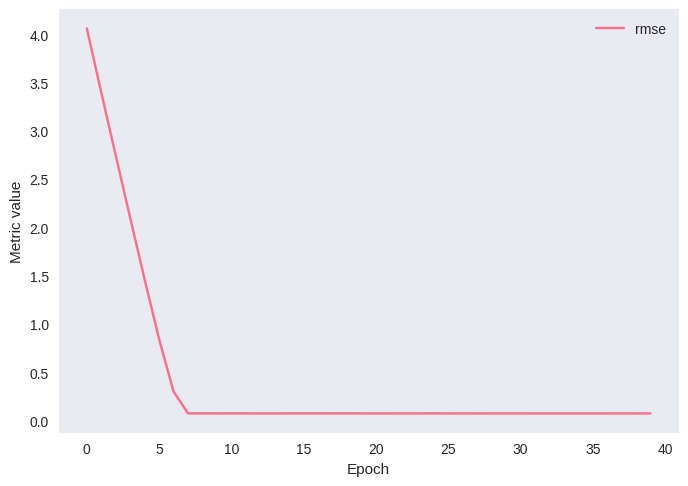

In [213]:
#@title Code - Experiment 1

# The following variables are the hyperparameters.
settings_1 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 40,
    batch_size = 10,
    input_features = ['Star_nota']
)

metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_1 = create_model(settings_1, metrics)

experiment_1 = train_model('one_feature', model_1, training_df, 'IMDB_Rating', settings_1)

ml_edu.results.plot_experiment_metrics(experiment_1, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_1, training_df, 'IMDB_Rating')

## Train a model with two features


Epoch 1/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 35.7683 - rmse: 5.9765
Epoch 2/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 22.1921 - rmse: 4.7074
Epoch 3/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 12.1391 - rmse: 3.4797
Epoch 4/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 5.3015 - rmse: 2.2961
Epoch 5/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3688 - rmse: 1.1593
Epoch 6/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0870 - rmse: 0.2938
Epoch 7/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0648 - rmse: 0.2544
Epoch 8/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0596 - rmse: 0.2436
Epoch 9/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0593 - rmse: 0.2430
Epoch 10/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0563 - rmse: 0.2370
Epoch 11/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0576 - rmse: 0.2398
Epoch 12/40
75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0560 - rmse: 0.2355
Epoch 13/40
75/75 ━━━━━━━━━━━━━━━━

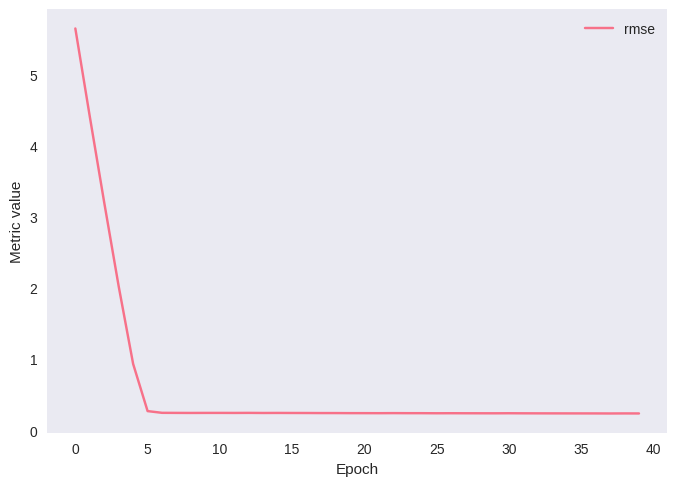

In [214]:
#@title Code - Experiment 3

# The following variables are the hyperparameters.
settings_3 = ml_edu.experiment.ExperimentSettings(
    learning_rate = 0.001,
    number_epochs = 40,
    batch_size = 10,
    input_features = ['Star_nota', 'Director_nota']
)


metrics = [keras.metrics.RootMeanSquaredError(name='rmse')]

model_3 = create_model(settings_3, metrics)

experiment_3 = train_model('two_features', model_3, training_df, 'IMDB_Rating', settings_3)

ml_edu.results.plot_experiment_metrics(experiment_3, ['rmse'])
ml_edu.results.plot_model_predictions(experiment_3, training_df, 'IMDB_Rating')

## Compare Experiments

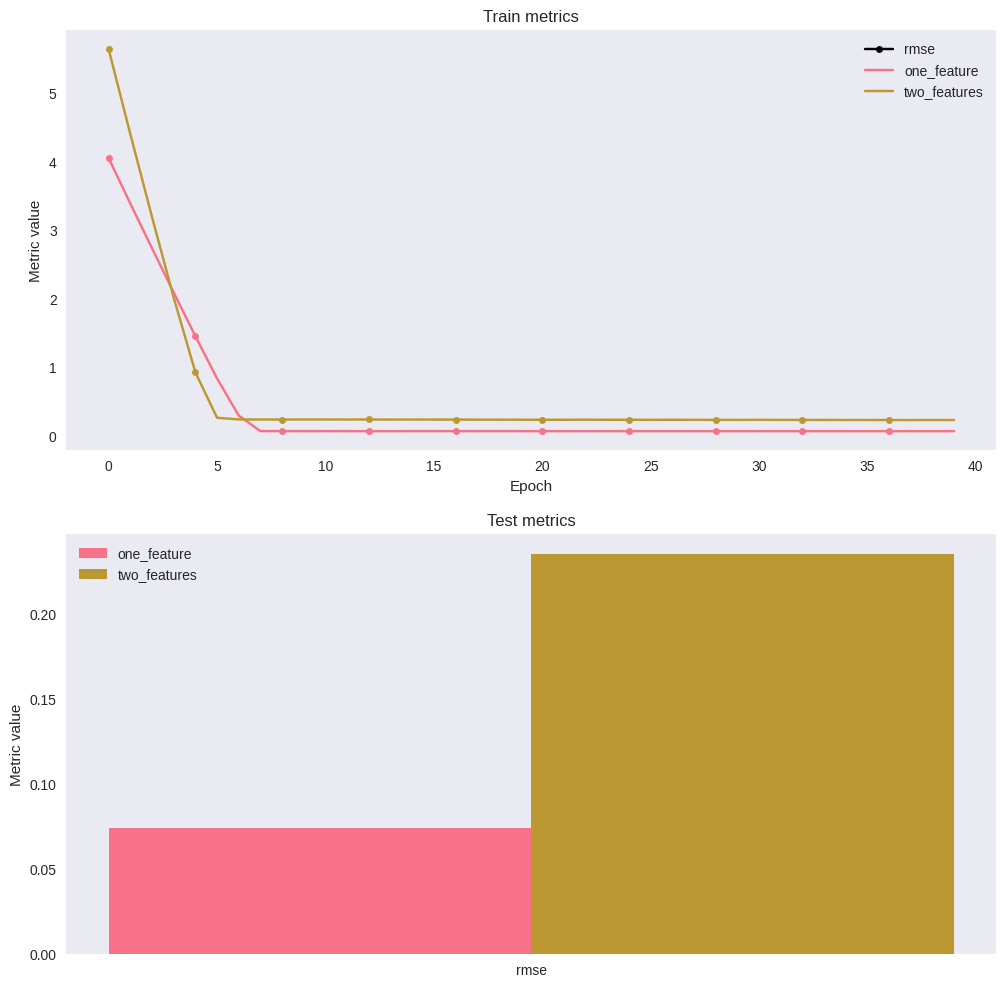

In [215]:
ml_edu.results.compare_experiment([experiment_1, experiment_3], ['rmse'], training_df, training_df['IMDB_Rating'].values)

# Validate Model


---

## Use the model to make predictions

In [216]:
training_df = training_df.drop(index=1)
training_df = pd.concat([training_df, film_prediction], ignore_index=True)

In [217]:
#@title Code - Define functions to make predictions

def build_batch(df, batch_size):
  batch = df.sample(n=batch_size).copy()
  batch.set_index(np.arange(batch_size), inplace=True)
  return batch

def predict_fare(model, df, features, label, batch_size=50):
  batch = build_batch(df, batch_size)
  predicted_values = model.predict_on_batch(x={name: batch[name].values for name in features})

  data = {"PREDICTED_FARE": [], "OBSERVED_FARE": [], "L1_LOSS": [],
          features[0]: [], features[1]: []}
  for i in range(batch_size):
    predicted = predicted_values[i][0]
    observed = batch.at[i, label]
    data["PREDICTED_FARE"].append(predicted)
    data["OBSERVED_FARE"].append(observed)
    data["L1_LOSS"].append(abs(observed - predicted))
    data[features[0]].append(batch.at[i, features[0]])

  output_df = pd.DataFrame(data)
  return output_df

def show_predictions(output):
  header = "-" * 80
  banner = header + "\n" + "|" + "PREDICTIONS".center(78) + "|" + "\n" + header
  print(banner)
  print(output)
  return

In [218]:
#@title Code - Make predictions

output = predict_fare(experiment_1.model, training_df, experiment_1.settings.input_features, 'IMDB_Rating')
show_predictions(output)

IndexError: list index out of range